# Content

1. [Load Data](#1)
2. [Separating Data into Test and Training Set](#2)
3. [Modeling](#3)
    - 3.1 [First Evaluation of Different Models](#4)
    - 3.2 [Area Under the Curve (AUC) and ](#5)
    - 3.3 [Logistic Regression Hyperparameter](#6)
    - 3.4 [Save the Model](#7)
4. [Conclusions](#8)

## 1. Load Data<a name = 1></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data_pca_10.csv')

In [3]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159367,-0.398411,-0.157124,-0.877404
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013361,0.240988,-0.711901,1.107011
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668165,0.097377,0.024069,0.454277
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059577,-1.405440,-1.116997
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936216,0.636377,-0.263810,0.377689
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596126,-0.035468,0.987938,0.256992
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716324,-1.113357,-0.105203,-0.108631
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341889,0.393917,0.520876
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223078,-0.280238,-0.542041,-0.089311


In [4]:
df2 = pd.read_csv('data_label_encoded.csv')

In [5]:
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2. Separating Data into Test and Training Set<a name = 2></a>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df
y = df2['diagnosis']

In [8]:
X.shape

(569, 10)

In [9]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159367,-0.398411,-0.157124,-0.877404
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013361,0.240988,-0.711901,1.107011
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668165,0.097377,0.024069,0.454277
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059577,-1.405440,-1.116997
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936216,0.636377,-0.263810,0.377689


In [10]:
y.shape

(569,)

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 3. Modelling<a name =3></a>

### 3.1 First Evaluation of Different Models<a name = 4></a>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Train each classifier on the scaled data and record their test accuracies
results = []
for name, clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and append to results
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])

results_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
0,Logistic Regression,0.982456
3,SVM,0.973684
2,Random Forest,0.956140
4,KNN,0.956140
5,Gradient Boosting,0.956140
1,Decision Tree,0.947368


### 3.2 Area Under the Curve (AUC)<a name = 5></a>



In [14]:
from sklearn.metrics import roc_auc_score

# Extract classifiers excluding SVM for AUC computation
classifiers_without_svm = [clf for clf in classifiers if clf[0] != 'SVM']

# Compute AUC for each classifier
auc_results_without_svm = []
for name, clf in classifiers_without_svm:
    # Get the probability scores for the positive class
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute AUC and append to results
    auc = roc_auc_score(y_test, y_prob)
    auc_results_without_svm.append((name, auc))

# Convert results to a DataFrame
auc_results_df_without_svm = pd.DataFrame(auc_results_without_svm, columns=['Classifier', 'AUC'])

auc_results_df_without_svm.sort_values(by='AUC', ascending=False)

,Classifier,AUC
0,Logistic Regression,0.997707
4,Gradient Boosting,0.996069
2,Random Forest,0.995414
3,KNN,0.982476
1,Decision Tree,0.953161


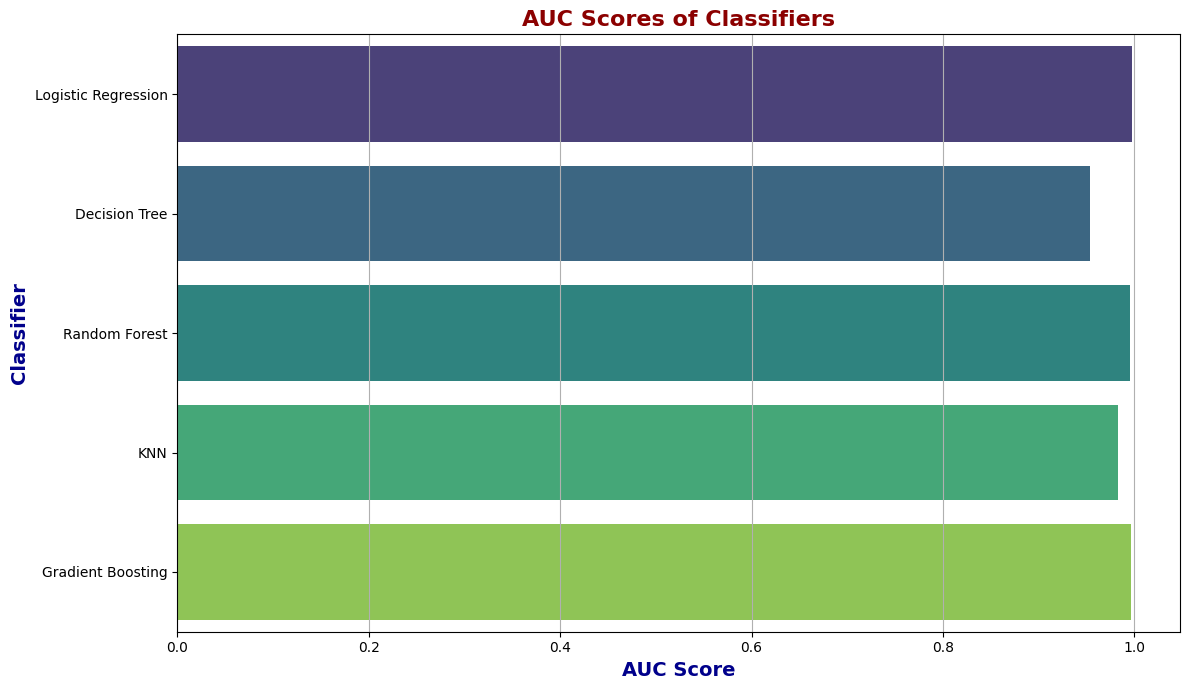

In [15]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 16}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 14}

plt.figure(figsize=(12, 7))
sns.barplot(x='AUC', y='Classifier', data=auc_results_df_without_svm, palette='viridis')
plt.title('AUC Scores of Classifiers', fontdict=title_font)
plt.xlabel('AUC Score', fontdict=axis_font)
plt.ylabel('Classifier', fontdict=axis_font)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

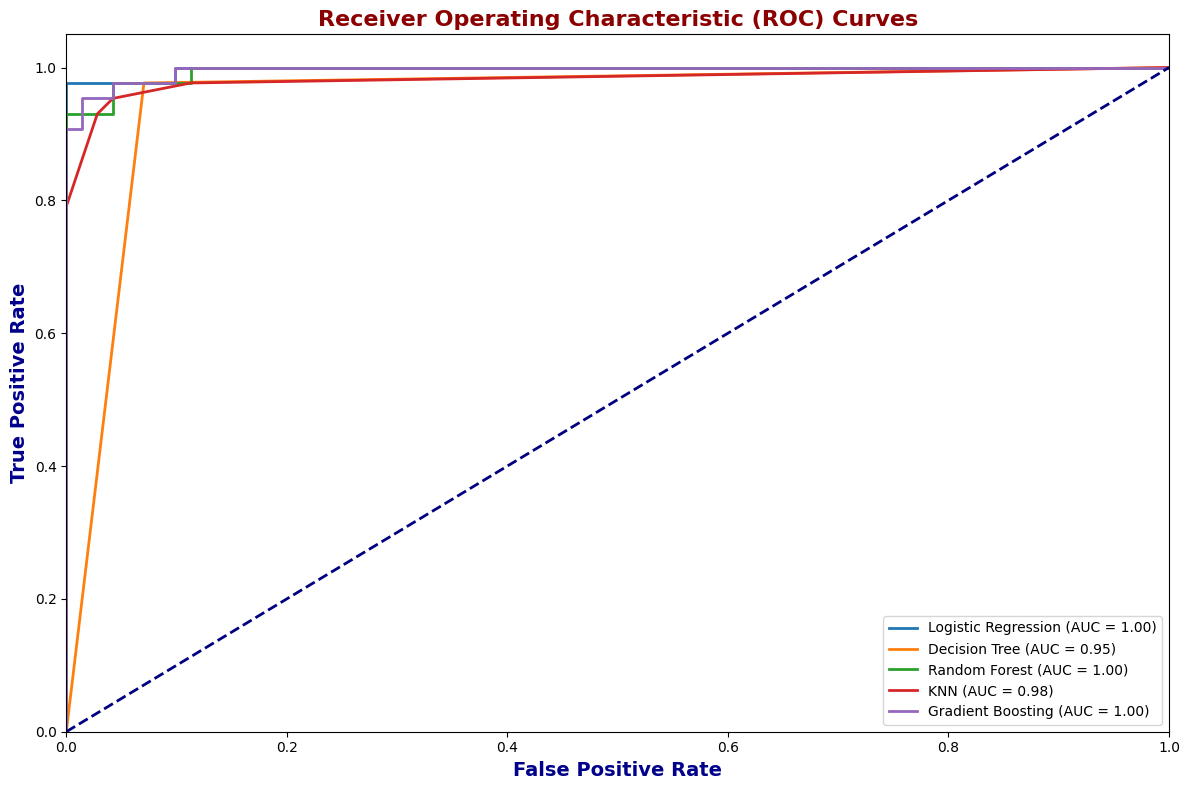

In [16]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# Plot the ROC curve for each classifier
for name, clf in classifiers_without_svm:
    # Get the probability scores for the positive class
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontdict=axis_font)
plt.ylabel('True Positive Rate', fontdict=axis_font)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontdict=title_font)
plt.legend(loc="lower right")
# plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

- **Logistic Regression** and **SVM** achieved the highest AUC scores, and **Logistic Regression** the highest accuracy, indicating excellent performance.
- **Decision Trees** had the lowest accuracy and AUC among the tested algorithms, it's still relatively high, suggesting decent classification ability.
- **Random Forest** and **GBM** also showed high AUC scores and accuracy, demonstrating their capability to differentiate between "Benign" and "Malignant" diagnoses.

### 3.3 Logistic Regression Hyperparameters<a name = 6></a>

In [17]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [18]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg

LogisticRegression(max_iter=10000, random_state=42)

In [19]:
param_grid= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

In [20]:
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,  # Here's the fix
                           cv=5,
                           scoring='accuracy',
                           verbose=1,  # to display progress
                           n_jobs=-1)  # use all processors for faster computation

In [ ]:
grid_search.fit(X_train, y_train)

In [22]:
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [23]:
log_reg_hyper = LogisticRegression(**best_params, random_state=42, max_iter=10000)
log_reg_hyper

LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear')

In [24]:
log_reg_hyper.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear')

In [25]:
y_pred_lr_hyper = log_reg_hyper.predict(X_test)

In [26]:
print("The test accuracy score of the Logistic Regression after hyperparameters tuning is: {}".format(accuracy_score(y_test, y_pred_lr_hyper)))
accuracy_lr_hyper = accuracy_score(y_test, y_pred_lr_hyper)

The test accuracy score of the Logistic Regression after hyperparameters tuning is: 0.9912280701754386


In [27]:
y_pred_lr_hyper_train = log_reg_hyper.predict(X_train)

In [28]:
print("The test accuracy score of the Logistic Regression after hyperparameters tuning is for the train set: {}".format(accuracy_score(y_train, y_pred_lr_hyper_train)))
accuracy_lr_hyper_train = accuracy_score(y_train, y_pred_lr_hyper_train)

The test accuracy score of the Logistic Regression after hyperparameters tuning is for the train set: 0.9824175824175824


In [29]:
# Predicting the probabilities for the positive class using the best model from grid search
y_prob_lr_hyper = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculating the AUC
auc_lr_hyper = roc_auc_score(y_test, y_prob_lr_hyper)

auc_lr_hyper

0.998689813298395

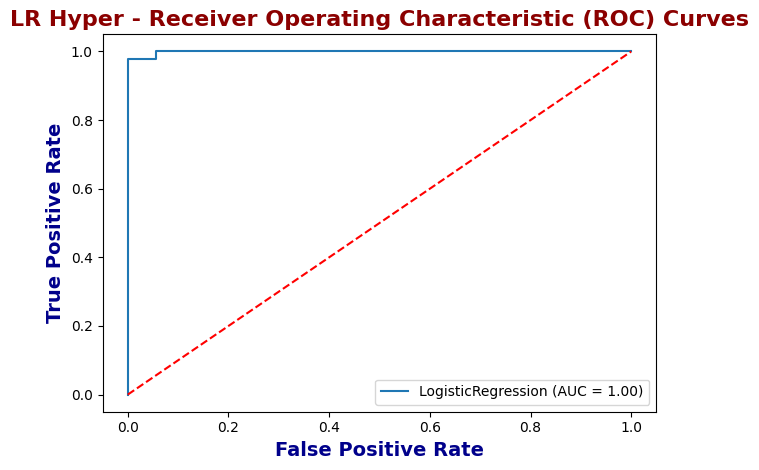

In [30]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_reg_hyper, X_test, y_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel('False Positive Rate', fontdict=axis_font)
plt.ylabel('True Positive Rate', fontdict=axis_font)
plt.title('LR Hyper - Receiver Operating Characteristic (ROC) Curves', fontdict=title_font)
plt.legend(loc="lower right")
# plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [31]:
rf_results = {
    'Model': ['Logistic Regression', 'Logistic Regression Hyper'],
    'Accuracy': [0.982456, accuracy_lr_hyper],
    'AUC': [0.997707, auc_lr_hyper]
}

# Creating a DataFrame from the results
results_rf = pd.DataFrame(rf_results)

results_rf

,Model,Accuracy,AUC
0,Logistic Regression,0.982456,0.997707
1,Logistic Regression Hyper,0.991228,0.998690


In [32]:
accuracy_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy (%)': [accuracy_lr_hyper_train * 100, accuracy_lr_hyper * 100]
})

accuracy_df

,Dataset,Accuracy (%)
0,Training,98.241758
1,Test,99.122807


The performance of the Logistic Regression model with the best hyperparameters from our grid search is:

* Training Accuracy: 98.24%
* Test Accuracy (accuracy_lr_hyper): 99.12%

The model performs slightly better on the test set than on the training set. This suggests that overfitting is unlikely. If there were overfitting, we'd typically see a much higher accuracy on the training set compared to the test set.

In this case, the model seems to generalize well to unseen data, and overfitting doesn't appear to be a concern.

### 3.4 Save the Model<a name = 7></a>

In [36]:
import joblib

# Saving the model to a file
model_filename = "logistic_regression_best_model.pkl"
joblib.dump(grid_search.best_estimator_, model_filename)

model_filename

'logistic_regression_best_model.pkl'

## 4. Conclusion<a name = 8></a>

Through this project, we gained valuable insights into the nature of breast cancer diagnostic data. The application of PCA for dimensionality reduction was effective in capturing the most important variance in the data while reducing the feature set. The Logistic Regression model, once tuned, provided highly accurate predictions.

The project emphasized the importance of thorough data exploration, preprocessing, and model evaluation in achieving a robust and effective predictive model.